In [7]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 707M/715M [00:09<00:00, 41.3MB/s]
100% 715M/715M [00:09<00:00, 77.8MB/s]


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [11]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [13]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 27.1 MB/s eta 0:00:00


In [14]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training data')
archive.close()

In [15]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image #img processing lib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [17]:
filenames = os.listdir('/content/train')

In [18]:
type(filenames)

list

In [19]:
len(filenames) #tells no. of images

50000

In [20]:
print(filenames[0:5])
print(filenames[-5:])

['40876.png', '33440.png', '5959.png', '49586.png', '42574.png']
['8075.png', '25834.png', '7615.png', '45213.png', '4421.png']


**Labels Processing**

In [21]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [22]:
labels_df.shape
# id and label

(50000, 2)

In [23]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
labels_df[labels_df['id'] == 77] #at any random no.

,id,label
76,77,truck


In [25]:
labels_df.tail(5)

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [26]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [27]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [28]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
# give numeric val to each obj
labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:]) #last 5 cols

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


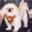

In [30]:
# displaying sample image
import cv2 #open cv lib
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/9689.png')
cv2_imshow(img)

In [31]:
labels_df[labels_df['id'] == 9689]

,id,label
9688,9689,dog


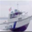

In [32]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/4898.png')
cv2_imshow(img)

In [33]:
labels_df[labels_df['id'] == 4898]

,id,label
4897,4898,ship


In [34]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [35]:
id_list = list(labels_df['id'])
# arranging them in order

In [36]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [37]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

print(type(data))
print(len(data))

<class 'list'>
50000


In [38]:
print(type(data[0]))

print(data[0].shape) # ht = 32, width= 32, color = 3 (red, green, blue)

print(data[0])

<class 'numpy.ndarray'>
(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [39]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

print(type(X))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [42]:
# scaling the data
# Divide by 255 to get all values btw 0 and 1
X_train_scaled = X_train/255

X_test_scaled = X_test/255

print(X_train_scaled)
print(X_train[0])

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

## Neural Network Model

In [43]:
import tensorflow as  tf # built by google
#pytorch by Facbook
from tensorflow import keras
#keras uses tf/pytorch for backend

In [44]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),

    keras.layers.Dense(64, activation='relu'), #rectified linear unit

    keras.layers.Dense(num_of_classes, activation='softmax') #softmax for multiclass classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# compile the neural network
model.compile(optimizer='adam', #

              loss='sparse_categorical_crossentropy', # numerically encoded labels

              metrics=['acc'])

In [46]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)
# an epoch refers to one complete cycle through the entire training dataset during the training process of a model.

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.2435 - loss: 2.0915 - val_acc: 0.3262 - val_loss: 1.8724
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3358 - loss: 1.8356 - val_acc: 0.3320 - val_loss: 1.8483
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.3517 - loss: 1.7931 - val_acc: 0.3537 - val_loss: 1.7724
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3634 - loss: 1.7731 - val_acc: 0.3715 - val_loss: 1.7446
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.3664 - loss: 1.7597 - val_acc: 0.3685 - val_loss: 1.7471
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.3809 - loss: 1.7381 - val_acc: 0.3750 - val_loss: 1.7305
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3854 - loss: 1.7268 - val_acc: 0.3832 - val_loss: 1.7328
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.3819 - loss: 1.7248 - val_acc: 0.3873 - val_loss: 1.7130
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━

**ResNet50**

In [47]:
from tensorflow.keras import Sequential, models, layers

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import load_model, Model

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import optimizers

Convolutional layer of ResNet 50 for better image analysis

In [48]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
#ImageNet is a vast dataset comprising over 14 million labeled images across more than 20,000 categories.

convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [49]:
num_of_classes = 10

model = models.Sequential()
#adding layers to model

# Upscale data of images
model.add(layers.UpSampling2D((2,2))) #64*64
model.add(layers.UpSampling2D((2,2))) #128*128
model.add(layers.UpSampling2D((2,2))) #256*256

model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization()) #ensures all values are in same range (btw 0 to 255)

#OVERFITTING
model.add(layers.Dense(128, activation='relu')) #rectified linear unit
model.add(layers.Dropout(0.5)) #turnoff few neurons to reduce overfit

model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(num_of_classes, activation='softmax')) #softmax for multiclass classification in output layer

In [50]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=6)

Epoch 1/10
  31/1125 ━━━━━━━━━━━━━━━━━━━━ 10:51:29 36s/step - acc: 0.1657 - loss: 2.7303

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()